# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
DATA_FOLDER = './Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.


## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [115]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [116]:
from IPython.core.display import HTML
HTML(DATA_FOLDER+'/titanic.html')
titanic_frame = pd.read_excel(DATA_FOLDER+'/titanic.xls',index_col=None)
titanic_frame['pclass'] = titanic_frame.pclass.astype('category')
titanic_frame['survived'] = titanic_frame.survived.astype('category')
titanic_frame['sex'] = titanic_frame.sex.astype('category')
titanic_frame['sibsp'] = titanic_frame.sibsp.astype('category')
titanic_frame['parch'] = titanic_frame.parch.astype('category')
titanic_frame['cabin'] = titanic_frame.cabin.astype('category')
titanic_frame['embarked'] = titanic_frame.embarked.astype('category')
titanic_frame['boat'] = titanic_frame.boat.astype('category')
titanic_frame['body'] = titanic_frame.body.astype('category')



For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

# Question 1

There are 14 Attributes. The first one is pclass which is an int between 1 and 3 that represent the class in which the passenger was (first, second or third). It can be Categorical (only 3)

The second attribute is the survived one, which is just an integer ( 1 or a 0) that represent if the passenger survived the acccident, so it can be categorical too.

The name are chains of characters and can't be categorical.

The sex attribute can be categorical as it is written as (male or female) and considered as an object, so we can categorize it.

The age attribute is in year, so it's a double as it seems some passenger were not even 1 year old, or the data are wrong ( the second passenger is 0.9167). There are also some missing data, it won't be categorical as there are too many values.

The sibsp attribute is the number of siblings/spouses aboard is an integer, and can be categorical as it has very few different values (categorical data stored with 8 bit index).

The parch attribute is the number of parent/children aboard is an integer, and can also be in a category as few different values.

The ticket attribute is an object that represent the ticket number and cannot be categorical as there are lot of different syntaxes.

The fare is a double that represent the price payed, it has too many different values to be categorized.

The cabin (string) is the level and number of cabin as there are only 186 different we can categorize it.

The embarked attribute is a char (C, Q or S) so can be categorical

The boat is an object (string) an can be categorize as there are 28 values.

The body is a double that is the body ID number, lot of values are NaN as they survived. There are 121 values and it can be categorical

The home.dest is a string that represent the home/destination of the passenger. Are they are too many values it can be categorized.


# Plots

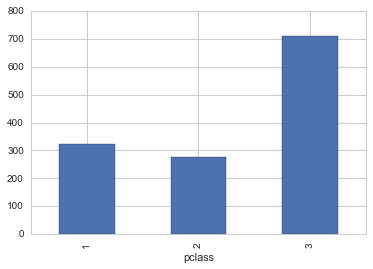

In [135]:
titanic_frame.groupby('pclass').size().plot(kind='bar')

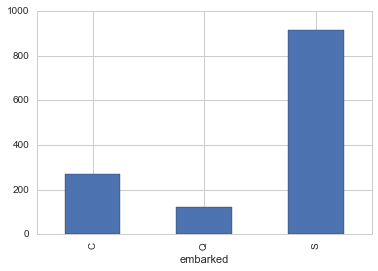

In [136]:
titanic_frame.groupby('embarked').size().plot(kind='bar')

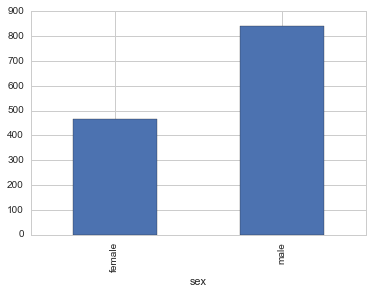

In [147]:
titanic_frame.groupby('sex').size().plot(kind='bar')

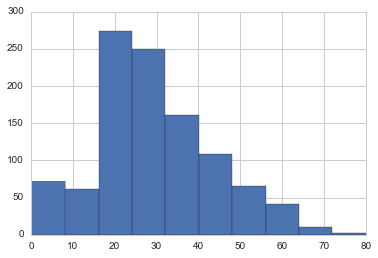

In [151]:
titanic_frame.age.hist(bins=10)

# Proportion of People by Cabin Floor

In [154]:
cabin = titanic_frame.cabin
cabin.treat.replace({r'B': 0, '5000U': 1, '10000U': 2})

0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
5           E12
6            D7
7           A36
8          C101
9           NaN
10      C62 C64
11      C62 C64
12          B35
13          NaN
14          A23
15          NaN
16      B58 B60
17      B58 B60
18          D15
19           C6
20          D35
21          D35
22         C148
23          NaN
24          C97
25          NaN
26          B49
27          B49
28          C99
29          C52
         ...   
1279        NaN
1280        NaN
1281        NaN
1282        NaN
1283        NaN
1284        NaN
1285        NaN
1286        NaN
1287        NaN
1288        NaN
1289        NaN
1290        NaN
1291        NaN
1292        NaN
1293        NaN
1294        NaN
1295        NaN
1296        NaN
1297        NaN
1298        NaN
1299        NaN
1300        NaN
1301        NaN
1302        NaN
1303        NaN
1304        NaN
1305        NaN
1306        NaN
1307        NaN
1308        NaN
Name: cabin, dtype: cate

# Survivor by pclass

number of survivor by class are
pclass
1    200
2    119
3    181
Name: survived, dtype: int64


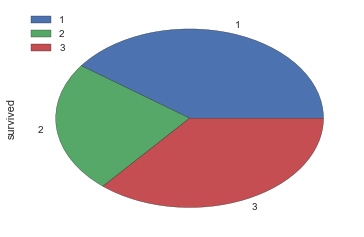

In [192]:
classSurv = titanic_frame.query('survived==1')
classSurv = classSurv.groupby('pclass').count()
classSurv.plot.pie(y='survived')
print("number of survivor by class are")
print(classSurv.survived)

# Survivor by Class and Sex

In [222]:
classSurv = titanic_frame.query('survived==1')
classSurv = classSurv.groupby('sex')
classSurv.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
